In [43]:
import math
import numpy as np
# 画图
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# 统计
from scipy import stats
import scipy.optimize as opt
from scipy.stats import norm, poisson
from scipy.optimize import leastsq
# 解决中文乱码问题
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

## 胸线图

In [2]:
x = np.arange(1, 0, -0.001)
x

array([  1.00000000e+00,   9.99000000e-01,   9.98000000e-01,
         9.97000000e-01,   9.96000000e-01,   9.95000000e-01,
         9.94000000e-01,   9.93000000e-01,   9.92000000e-01,
         9.91000000e-01,   9.90000000e-01,   9.89000000e-01,
         9.88000000e-01,   9.87000000e-01,   9.86000000e-01,
         9.85000000e-01,   9.84000000e-01,   9.83000000e-01,
         9.82000000e-01,   9.81000000e-01,   9.80000000e-01,
         9.79000000e-01,   9.78000000e-01,   9.77000000e-01,
         9.76000000e-01,   9.75000000e-01,   9.74000000e-01,
         9.73000000e-01,   9.72000000e-01,   9.71000000e-01,
         9.70000000e-01,   9.69000000e-01,   9.68000000e-01,
         9.67000000e-01,   9.66000000e-01,   9.65000000e-01,
         9.64000000e-01,   9.63000000e-01,   9.62000000e-01,
         9.61000000e-01,   9.60000000e-01,   9.59000000e-01,
         9.58000000e-01,   9.57000000e-01,   9.56000000e-01,
         9.55000000e-01,   9.54000000e-01,   9.53000000e-01,
         9.52000000e-01,

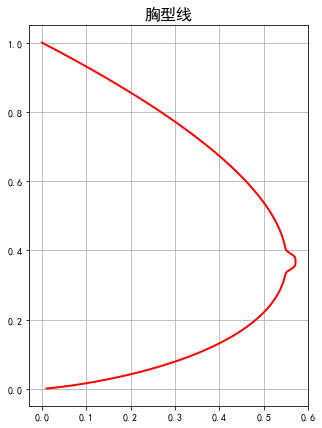

In [21]:
# log -> 对数
# exp -> 指数
y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
# 设置尺寸和背景
plt.figure(figsize = (5, 7), facecolor = 'w')
# 'r-' 红色 - 形状
plt.plot(y, x, 'r-', linewidth = 2)
# 网格
plt.grid(True)
# title
plt.title(u'胸型线', fontsize = 16)
plt.show()

### 心形图

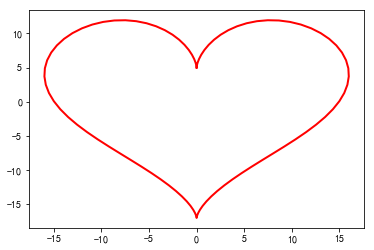

In [22]:
t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t) ** 3
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)
plt.plot(x, y, 'r-', linewidth = 2)
plt.show()

## 渐开线

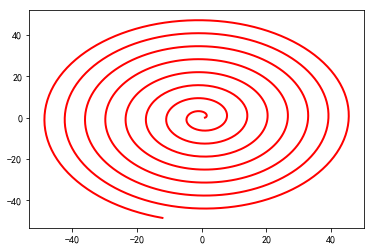

In [24]:
t = np.linspace(0, 50, 1000)
x = t * np.sin(t) + np.cos(t)
y = np.sin(t) - t * np.cos(t)
plt.plot(x, y, 'r-', linewidth = 2)
plt.show()

### Bar

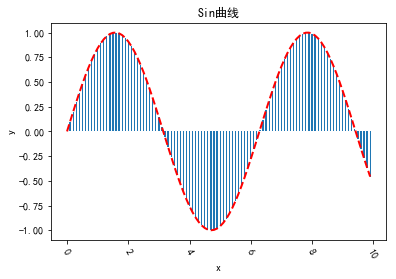

In [26]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.bar(x, y, width = 0.04, linewidth = 0.2)
plt.plot(x, y, 'r--', linewidth = 2)
plt.title(u'Sin曲线')
plt.xticks(rotation = -60)
# 坐标
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 概率分布

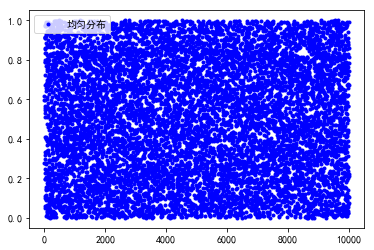

In [32]:
# 10000 个样本，包好 0 不包含 1
x = np.random.rand(10000)
t = np.arange(len(x))

# 直方图 30 份，0.5的透明度
# plt.hist(x, 30, color='m', alpha = 0.5, label = '均匀分布')

# plt.plot(t, x, 'r-', label='均匀分布')

plt.plot(t, x, 'b.', label='均匀分布')

plt.legend(loc = 'upper left')
plt.show()

### 验证 中心极限定理 -> 高斯函数图像

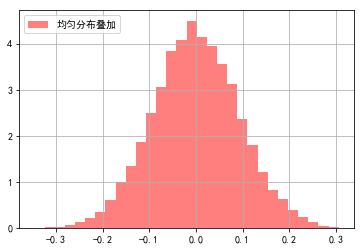

In [33]:
t = 1000
# 全零矩阵
a = np.zeros(10000)
for i in range(t):
    # 从 -5 到 5 做均匀分布
    a += np.random.uniform(-5, 5, 10000)
a /= t
plt.hist(a, bins = 30, color = 'r', alpha = 0.5, normed = True, label = '均匀分布叠加')
# 标签放在左上方
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

### 其他分布的中心极限定理

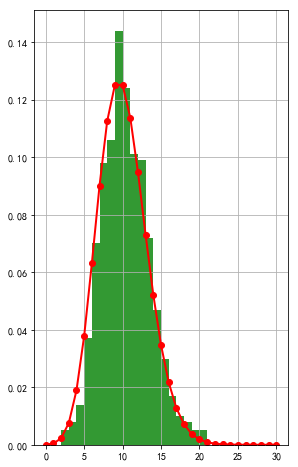

In [37]:
lamda = 10
# 模型
p = stats.poisson(lamda)
# 离散随机值采样 -> 满足lamda = 10
y = p.rvs(size = 1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]
plt.figure(figsize = (10, 8), facecolor = 'w')
# 1 行 2 列 现在画第 1 个图
plt.subplot(121)
# range -> 范围
# 采样得到的质量函数
plt.hist(y, bins = bins, range = r, color = 'g', alpha = 0.8, normed = True)
t = np.arange(0, mx + 1)
# pmf -> 概率质量函数
plt.plot(t, p.pmf(t), 'ro-', lw = 2)
plt.grid(True)
plt.show()

### Poission 分布

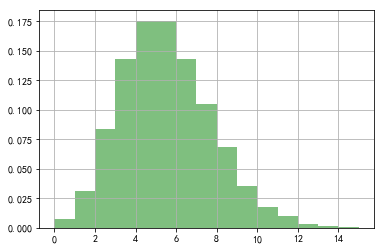

(array([ 0.00710071,  0.03080308,  0.08350835,  0.14321432,  0.1750175 ,
        0.17561756,  0.14321432,  0.10521052,  0.06870687,  0.03540354,
        0.01750175,  0.00960096,  0.00320032,  0.00140014,  0.00050005]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


In [40]:
x = np.random.poisson(lam = 5, size = 10000)
x
pillar = 15
a = plt.hist(x, bins = pillar, normed = True, range = [0, pillar], color = 'g', alpha = 0.5)
plt.grid()
plt.show()
print(a)
# 求和
print(a[0].sum())

### 绘制正态分布概率密度函数图

In [41]:
# 均值
mu = 0
# 方差
sigma = 1
# 创建等差数列
# 均值加减 3倍 的方差，同时保证 0 可以一定被取到
# 行向量
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 51)
print(x.shape)

(51,)


In [44]:
# exp -> 指数
# math.sqrt -> 根号(开方)
# 满足均值，方差的y
y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
print(y.shape)

(51,)


In [45]:
# 创建独立绘图空间
# facecolor -> 背景去白色
plt.figure(facecolor = 'w')

In [46]:
# 画图
# params -> 横坐标，纵坐标，颜色和样式，横坐标，纵坐标，颜色和样式，线状样式的宽度为2， 圆圈样式的大小为8
# plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)

In [47]:
# 只画线
# ro-  => 红色 圆圈 线
plt.plot(x, y, 'ro-', linewidth = 1)

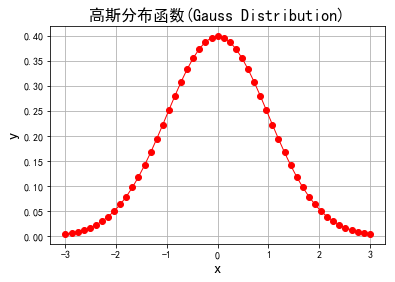

In [48]:
# 横纵坐标 指定 标记 字号为 15
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
# 配置中文标题
plt.title('高斯分布函数(Gauss Distribution)', fontsize = 16)
# 边界(虚线格子)
plt.grid(True)
plt.show()